Number of times the person wakes up from sleep and correlating it with the Diabetic patients using washroom

In [13]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/sujitc/Desktop/Wearables/Signatures/')

import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('V1_steps.csv')
df = df.set_index(['datetime'])
df.drop('user', axis =1, inplace=True)
df= df[np.logical_and(df.index>='2022-06-24 00:00:00', df.index<='2022-06-24 09:00:00')]
df = df.reset_index()
df['Time'] = [t[11:19] for t in df['datetime']]
df['Date'] = [t[0:10] for t in df['datetime']]

In [15]:
df1 = pd.read_csv('V1_hr.csv')
df1 = df1.set_index(['datetime'])
df1= df1[np.logical_and(df1.index>='2022-06-24 00:00:00', df1.index<='2022-06-24 09:00:00')]
df1 = df1.reset_index()

In [ ]:
awake_df = df[df['steps']!=0.0]
awake_df.dropna(inplace=True)

In [17]:
sleep = pd.read_csv('V1_intraday_sleep_2022-06-24.csv')


In [18]:
sleep['Time'] = [t[11:19] for t in sleep['Timestamp']]
sleep['Date'] = [t[0:10] for t in sleep['Timestamp']]
sleep.drop('Timestamp', axis = 1, inplace=True)
# sleep

In [19]:
sleep_wake = sleep[sleep['Sleep Type']=='wake']
sleep_wake = sleep_wake.reset_index()
sleep_light = sleep[sleep['Sleep Type']=='light']
sleep_light = sleep_light.reset_index()
sleep_rem = sleep[sleep['Sleep Type']=='rem']
sleep_rem = sleep_rem.reset_index()
sleep_deep = sleep[sleep['Sleep Type']=='deep']
sleep_deep = sleep_deep.reset_index()

In [20]:
sleep_wake['Time'] = sleep_wake['Time'].astype('str')
sleep_wake['Time_min'] = sleep_wake['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
sleep_light['Time'] = sleep_light['Time'].astype('str')
sleep_light['Time_min'] = sleep_light['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
sleep_rem['Time'] = sleep_rem['Time'].astype('str')
sleep_rem['Time_min'] = sleep_rem['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
sleep_deep['Time'] = sleep_deep['Time'].astype('str')
sleep_deep['Time_min'] = sleep_deep['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [21]:
w = []
for i in range(len(sleep_wake.Time_min)):
    a  = sleep_wake.Time_min[i] + sleep_wake['Minutes Asleep'][i]
    w.append(a)
x = []
for i in range(len(sleep_light.Time_min)):
    b  = sleep_light.Time_min[i] + sleep_light['Minutes Asleep'][i]
    x.append(b)
y = []
for i in range(len(sleep_rem.Time_min)):
    c  = sleep_rem.Time_min[i] + sleep_rem['Minutes Asleep'][i]
    y.append(c)
z= []
for i in range(len(sleep_deep.Time_min)):
    d  = sleep_deep.Time_min[i] + sleep_deep['Minutes Asleep'][i]
    z.append(d)


In [22]:
sleep_wake['End_Time'] = w
sleep_light['End_Time'] = x
sleep_rem['End_Time'] = y
sleep_deep['End_Time'] = z

In [23]:
sle = ['sleep_wake', 'sleep_light', 'sleep_rem', 'sleep_deep']
color = ['y','purple', 'r', 'g']

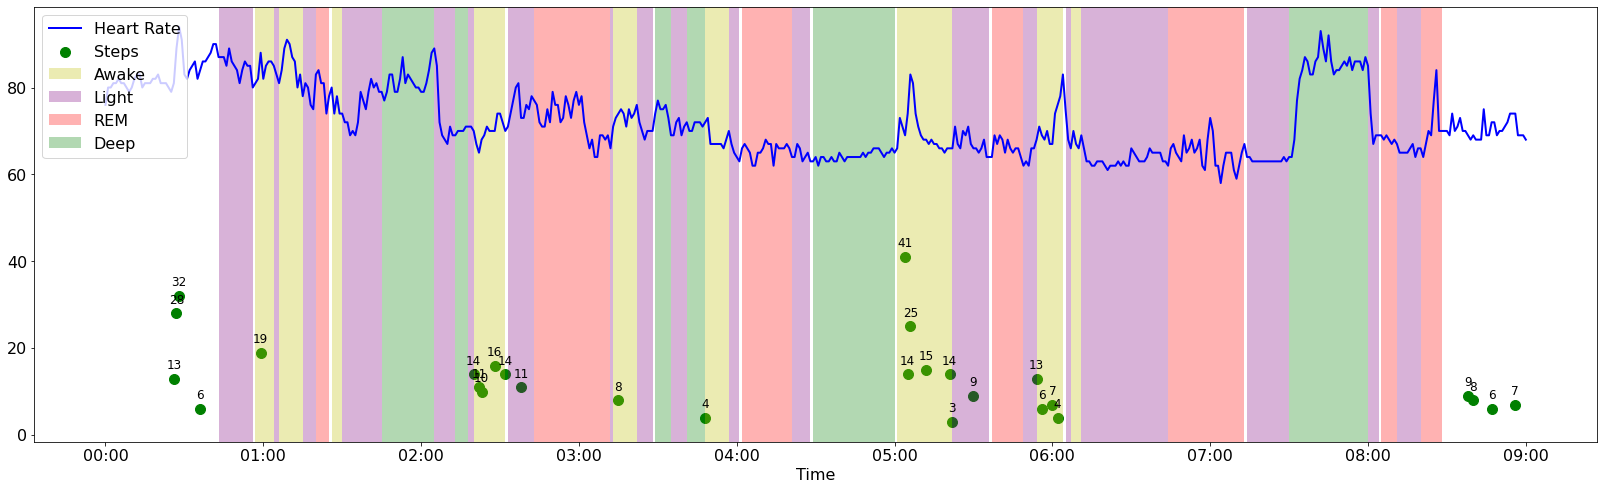

In [26]:
plt.plot(df1['datetime'], df1['heartrate'], color='blue', label = 'Heart Rate',  linewidth=2)
plt.scatter(awake_df['datetime'], awake_df['steps'], c='green',label = 'Steps', s = 100)

# for j in sle:
#     for k in color:
#         for i in range(len(f'{str(j)}.End_Time')):
#             plt.axvspan(f'{str(j)}.Time_min[i]', f'{str(j)}.End_Time[i]', facecolor=f'{str(k)}', alpha=0.3)

plt.axvspan(sleep_wake.Time_min[0], sleep_wake.End_Time[0], facecolor='y', alpha=0.3, label = 'Awake')
plt.axvspan(sleep_light.Time_min[0], sleep_light.End_Time[0], facecolor='purple', alpha=0.3, label = 'Light')
plt.axvspan(sleep_rem.Time_min[0], sleep_rem.End_Time[0], facecolor='r', alpha=0.3, label = 'REM')
plt.axvspan(sleep_deep.Time_min[0], sleep_deep.End_Time[0], facecolor='g', alpha=0.3, label = 'Deep')
for i in range(1, len(sleep_wake.End_Time)):
    wake = plt.axvspan(sleep_wake.Time_min[i], sleep_wake.End_Time[i], facecolor='y', alpha=0.3)

for i in range(1, len(sleep_light.End_Time)):
    light = plt.axvspan(sleep_light.Time_min[i], sleep_light.End_Time[i], facecolor='purple', alpha=0.3)

for i in range(1, len(sleep_rem.End_Time)):
    rem = plt.axvspan(sleep_rem.Time_min[i], sleep_rem.End_Time[i], facecolor='r', alpha=0.3)

    
for i in range(1, len(sleep_deep.End_Time)):
    deep = plt.axvspan(sleep_deep.Time_min[i], sleep_deep.End_Time[i], facecolor='g', alpha=0.3)


for x,y in zip(awake_df['datetime'],awake_df['steps']):

    label = round(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center'
                ,fontsize =12)

plt.legend(loc='upper left', fontsize =16)
plt.xlabel('Time', fontsize =16) 
# plt.ylabel('Heart Rate')

a = (0, 60,  120, 180, 240 , 300, 360 , 420, 480, 540)
x = ('00:00','01:00', '02:00','03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00')
plt.xticks(a, x, fontsize = 16)
plt.yticks(fontsize =16)
plt.rcParams['figure.figsize'] = [28, 8]
plt.show()